In [7]:
import xarray as xr
import os

In [8]:
local_file='E:\\weatherbench\\2.8125deg\\2.8125deg\\2m_temperature\\2m_temperature_2.8125deg'

In [9]:
d = xr.open_dataset(os.path.join(local_file, "2m_temperature_1995_2.8125deg.nc"))

In [10]:
d

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -88.59 -85.78 -82.97 -80.16 ... 82.97 85.78 88.59
  * time     (time) datetime64[ns] 1995-01-01 ... 1995-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-08 06:30:10 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [12]:
lats = [40.78125, 43.59375]
lons = [284.0625, 286.875]

In [13]:
x=dict(lat=slice(lats[0], lats[1]), lon=slice(lons[0], lons[1]))

In [14]:
x

{'lat': slice(40.78125, 43.59375, None), 'lon': slice(284.0625, 286.875, None)}

In [20]:
y=d.loc[x].to_dataframe()

In [24]:
y.to_csv("2m_temp")

In [18]:
import pandas as pd

In [19]:
data=pd.read_csv("2m_temp")

In [12]:
datasub=data.loc[(data['lon']==286.8750) & (data['lat']==40.78125)]

In [15]:
datasub['t2m']

17520    279.44675
17521    279.76233
17522    280.04830
17523    279.91022
17524    280.00888
           ...    
26275    277.73468
26276    278.01880
26277    277.78802
26278    276.18817
26279    276.15460
Name: t2m, Length: 8760, dtype: float64

In [47]:
import emd
import numpy as np
d=datasub['t2m']-datasub['t2m'].mean()
d

17520   -5.637059
17521   -5.321479
17522   -5.035509
17523   -5.173589
17524   -5.074929
           ...   
26275   -7.349129
26276   -7.065009
26277   -7.295789
26278   -8.895639
26279   -8.929209
Name: t2m, Length: 8760, dtype: float64

In [48]:
imf = emd.sift.sift(np.array(d))

<AxesSubplot:xlabel='Time (samples)'>

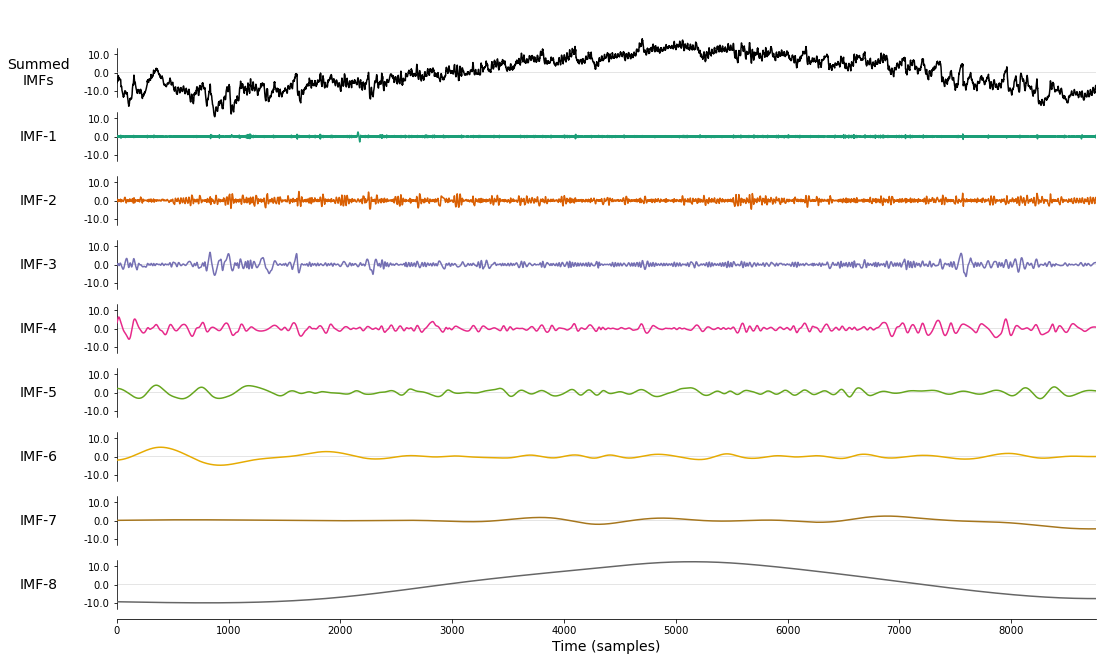

In [49]:
emd.plotting.plot_imfs(imf)

In [50]:
imf.shape

(8760, 8)

In [86]:
x=np.array([imf[i, 2] for i in range(imf.shape[0])])

In [91]:
detrend=np.array([np.sum([imf[i,j] for j,val in enumerate(imf[i]) if j!=7 and j!=2 and j!=6]) for i in range(imf.shape[0])])

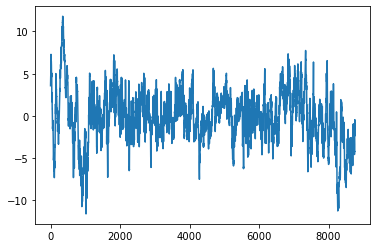

In [92]:
plt.plot(detrend)